## Time series

In [52]:
# Question 1: Download a price time series using an API

%matplotlib inline
from pandas_datareader import data as pdr
import yfinance
import datetime 
import matplotlib.pyplot as plt

start = datetime.datetime(2021, 4, 20)
end = datetime.datetime(2022, 2, 1)

fdx = pdr.get_data_yahoo('FDX', start,end)

len(fdx)

200

In [53]:
# FedEx Time Series
fdx

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-20,283.799988,277.339996,282.420013,280.339996,1425300.0,278.006195
2021-04-21,281.070007,277.089996,279.049988,278.260010,1861400.0,275.943512
2021-04-22,281.070007,276.380005,277.329987,276.540009,1444800.0,274.237854
2021-04-23,279.190002,276.970001,278.519989,277.739990,1312800.0,275.427826
2021-04-26,279.869995,274.200012,279.309998,275.760010,1747000.0,273.464325
...,...,...,...,...,...,...
2022-01-26,248.250000,241.220001,245.809998,243.160004,2010800.0,243.160004
2022-01-27,247.639999,239.679993,245.250000,241.929993,1865700.0,241.929993
2022-01-28,244.910004,239.130005,241.139999,244.779999,2287600.0,244.779999


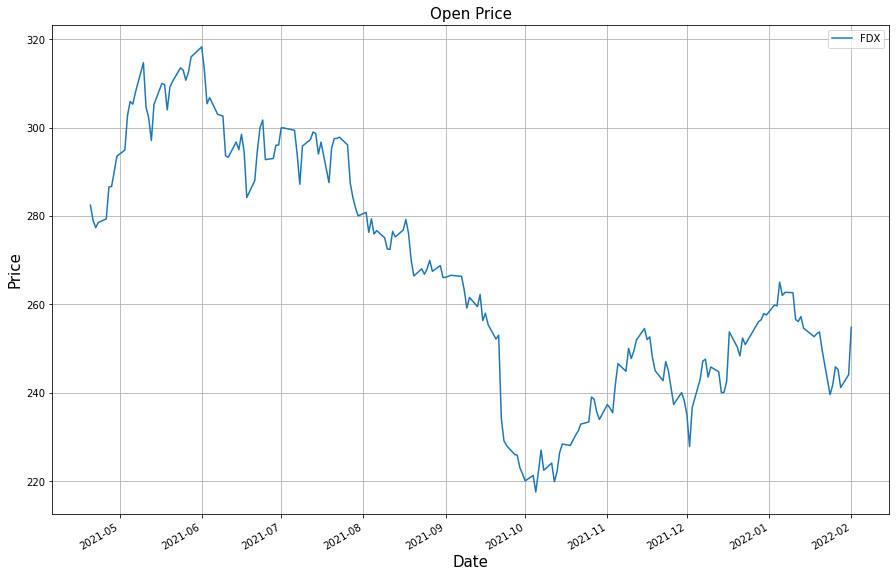

In [54]:
# Question 2: Plot the price time series

fdx['Open'].plot(label='FDX', figsize=(15,10))
plt.xlabel('Date').set_fontsize(15)
plt.ylabel('Price').set_fontsize(15)
plt.title('Open Price').set_fontsize(15)
plt.legend()
plt.grid()
plt.show()

## Moving averages

In [55]:
# Question 4: Compute three price moving averages, with time-windows τ = 5,10,20

fdx['5day_mavg'] = fdx['Open'].rolling(window=5).mean()
fdx['10day_mavg'] = fdx['Open'].rolling(window=10).mean()
fdx['20day_mavg'] = fdx['Open'].rolling(window=20).mean()

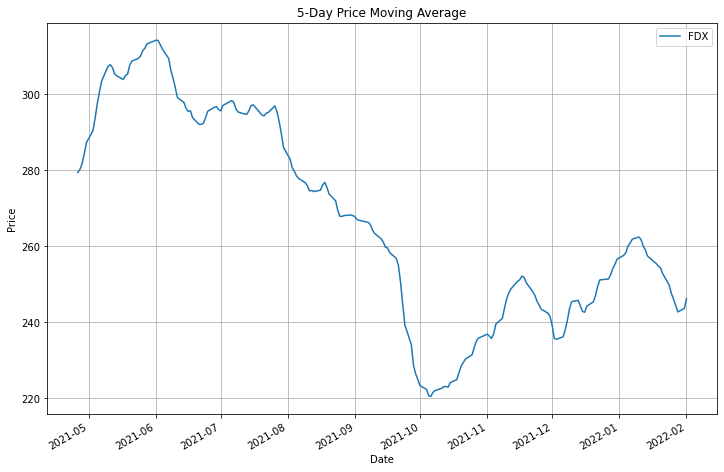

In [56]:
fdx['5day_mavg'].plot(label='FDX', figsize=(12,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('5-Day Price Moving Average')
plt.legend()
plt.grid()
plt.show()

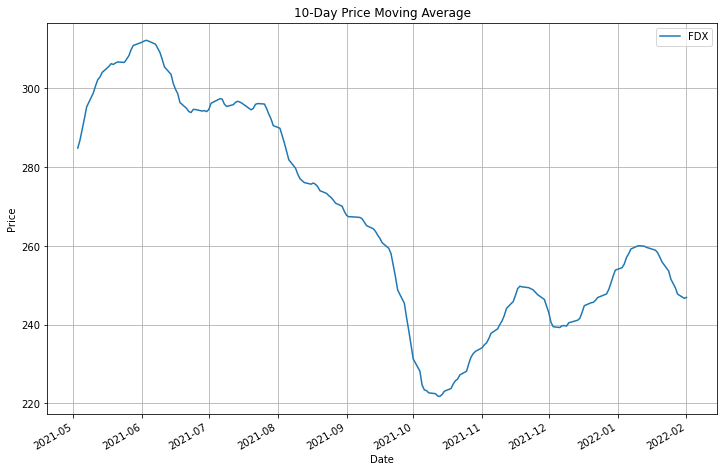

In [57]:
fdx['10day_mavg'].plot(label='FDX', figsize=(12,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('10-Day Price Moving Average')
plt.legend()
plt.grid()
plt.show()

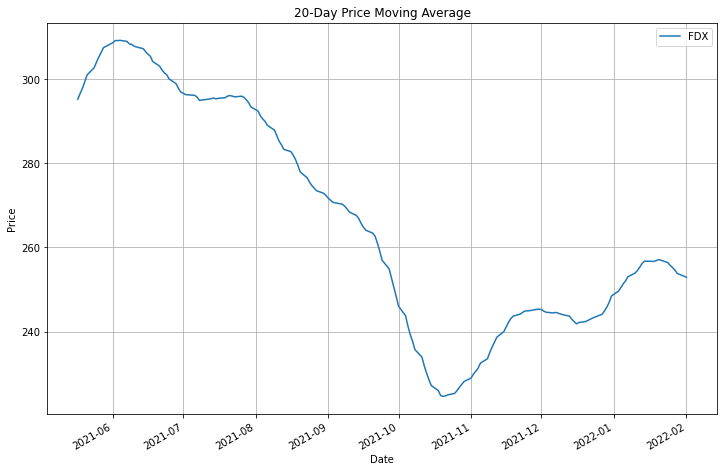

In [58]:
fdx['20day_mavg'].plot(label='FDX', figsize=(12,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('20-Day Price Moving Average')
plt.grid()
plt.legend()
plt.show()

Question 5: Plot the moving averages against the price time series

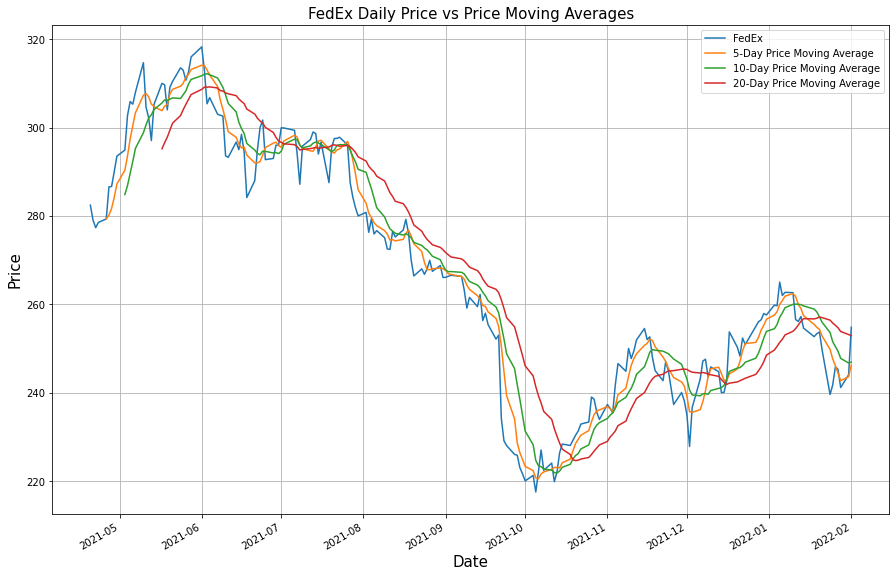

In [59]:
# Question 5: Plot the moving averages against the price time series

plt.figure(figsize=(15,10))

fdx['Open'].plot()
fdx['5day_mavg'].plot()
fdx['10day_mavg'].plot()
fdx['20day_mavg'].plot()

plt.title('FedEx Daily Price vs Price Moving Averages').set_fontsize(15)
plt.xlabel('Date').set_fontsize(15)
plt.ylabel('Price').set_fontsize(15)
plt.grid()
plt.legend(['FedEx','5-Day Price Moving Average','10-Day Price Moving Average','20-Day Price Moving Average'])
plt.show()

In [60]:
# Question 6: Compute the return of the price time series 

def daily_change(x):
    return x.shift(-1) / x -1   

fdx['return'] = daily_change(fdx['Close'])  
print(fdx['return'].dropna())

Date
2021-04-20   -0.007420
2021-04-21   -0.006181
2021-04-22    0.004339
2021-04-23   -0.007129
2021-04-26    0.042610
                ...   
2022-01-25   -0.003606
2022-01-26   -0.005058
2022-01-27    0.011780
2022-01-28    0.004412
2022-01-31    0.024974
Name: return, Length: 199, dtype: float64


In [61]:
# Question 7: Compute the three return moving averages, with time-windows τ = 5,10,20

fdx['5day_return_mavg'] = fdx['return'].rolling(window=5).mean()
fdx['10day_return_mavg'] = fdx['return'].rolling(window=10).mean()
fdx['20day_return_mavg'] = fdx['return'].rolling(window=20).mean()

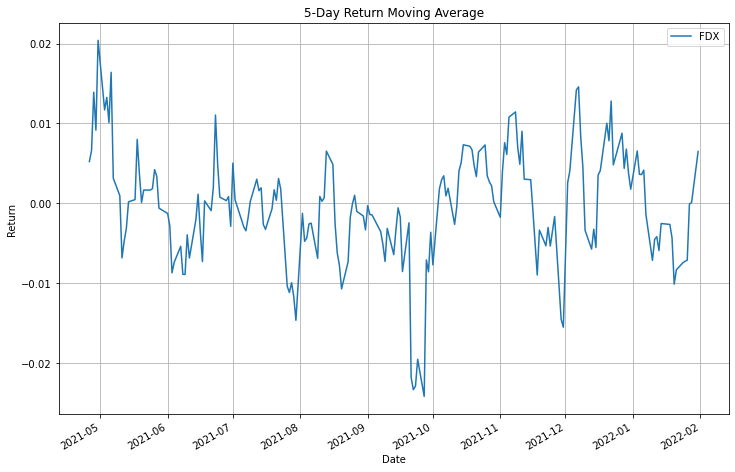

In [62]:
fdx['5day_return_mavg'].plot(label='FDX', figsize=(12,8))

plt.title('5-Day Return Moving Average')
plt.ylabel('Return')
plt.legend()
plt.grid()
plt.show()

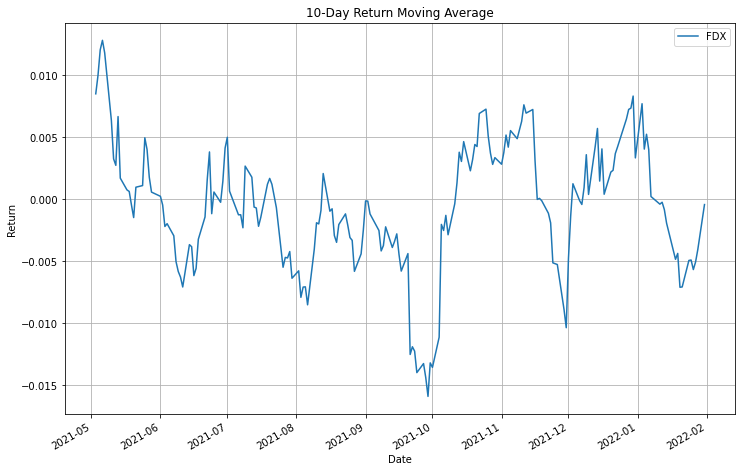

In [63]:
fdx['10day_return_mavg'].plot(label='FDX', figsize=(12,8))
plt.xlabel('Date').set
plt.ylabel('Return')
plt.title('10-Day Return Moving Average')
plt.legend()
plt.grid()
plt.show()

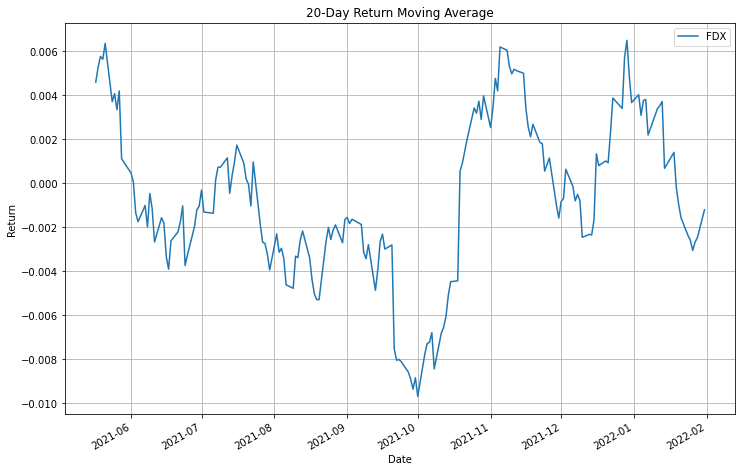

In [64]:
fdx['20day_return_mavg'].plot(label='FDX', figsize=(12,8))
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('20-Day Return Moving Average')
plt.legend()
plt.grid()
plt.show()

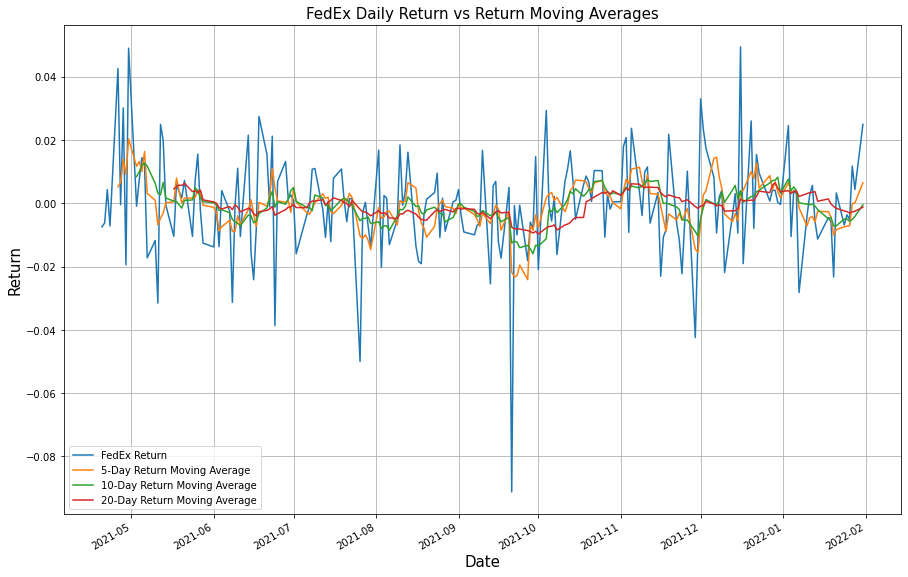

In [65]:
#Question 8: Plot the return moving averages against the return time series

fdx['return'].plot(figsize=(15,10))
fdx['5day_return_mavg'].plot()
fdx['10day_return_mavg'].plot()
fdx['20day_return_mavg'].plot()

plt.legend(['FedEx Return','5-Day Return Moving Average','10-Day Return Moving Average','20-Day Return Moving Average'])
plt.title('FedEx Daily Return vs Return Moving Averages').set_fontsize(15)
plt.xlabel('Date').set_fontsize(15)
plt.ylabel('Return').set_fontsize(15)
plt.grid()
plt.show()

## Time Series Analysis

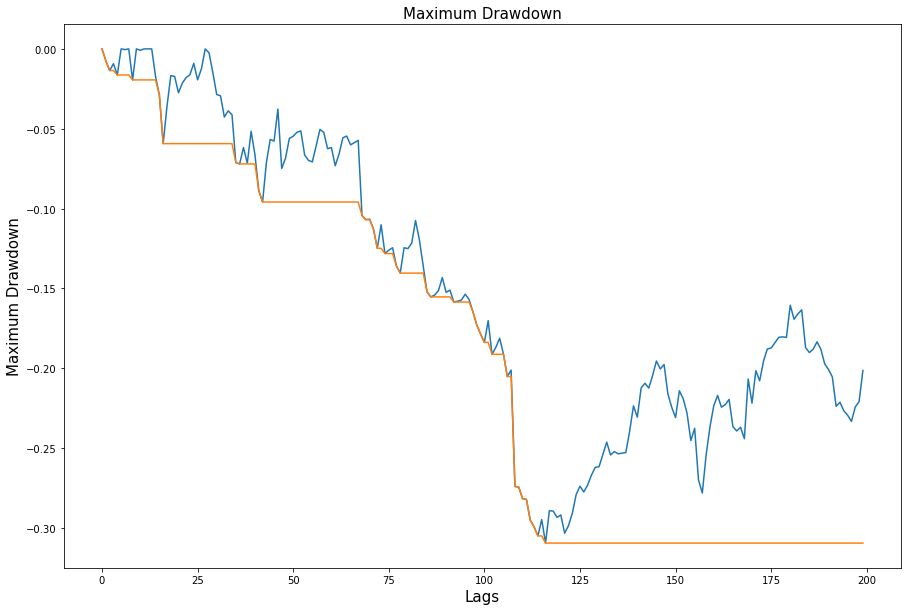

In [66]:
# Question 11: Compute and plot the MDD

from matplotlib.pyplot import figure

fdx_dat = fdx['Close'];

window = len(fdx_dat)

Roll_Max = [] 
Daily_Drawdown = []
Max_Drawdown = []

for t in range(window):
    Roll_Max.append(fdx_dat[0:t+1].max())  
    Daily_Drawdown.append(fdx_dat[t]/Roll_Max[t] - 1.0)  
    Max_Drawdown.append(min(Daily_Drawdown[0:t+1]))

figure(figsize=(15,10))
plt.plot(Daily_Drawdown)
plt.plot(Max_Drawdown)
plt.xlabel('Lags').set_fontsize(15)
plt.ylabel('Maximum Drawdown').set_fontsize(15)
plt.title('Maximum Drawdown').set_fontsize(15)
plt.show()

In [67]:
import warnings
warnings.filterwarnings('ignore')

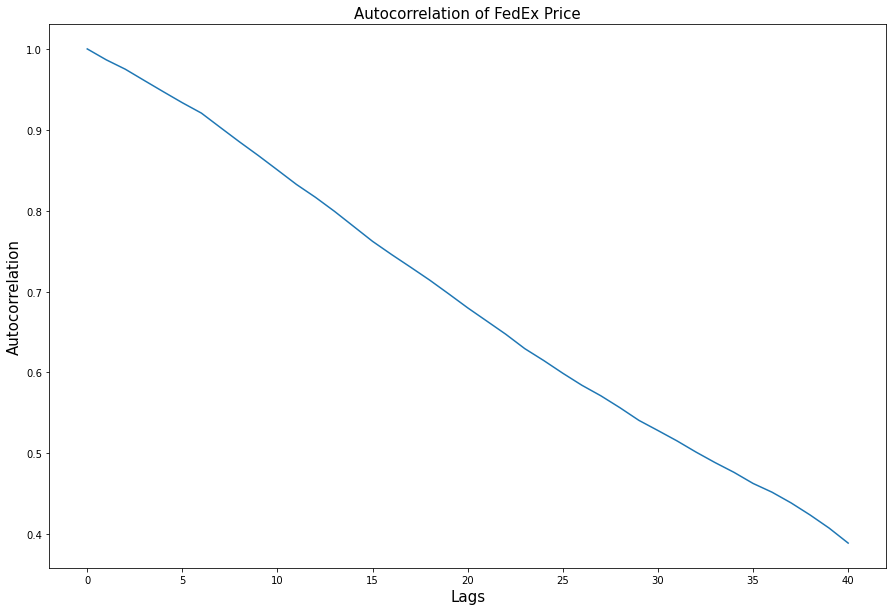

In [68]:
# Question 13: Compute the auto-correlation function (ACF) of the price time series

import numpy as np
from pandas_datareader import data as pdr
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import statsmodels
import statsmodels.api as sm

close_fdx = fdx['Close']

pacf_fdx = statsmodels.tsa.stattools.acf(close_fdx)

figure(figsize=(15,10))
plt.plot(pacf_fdx)
plt.xlabel('Lags').set_fontsize(15)
plt.ylabel('Autocorrelation').set_fontsize(15)
plt.title('Autocorrelation of FedEx Price').set_fontsize(15)
plt.show()

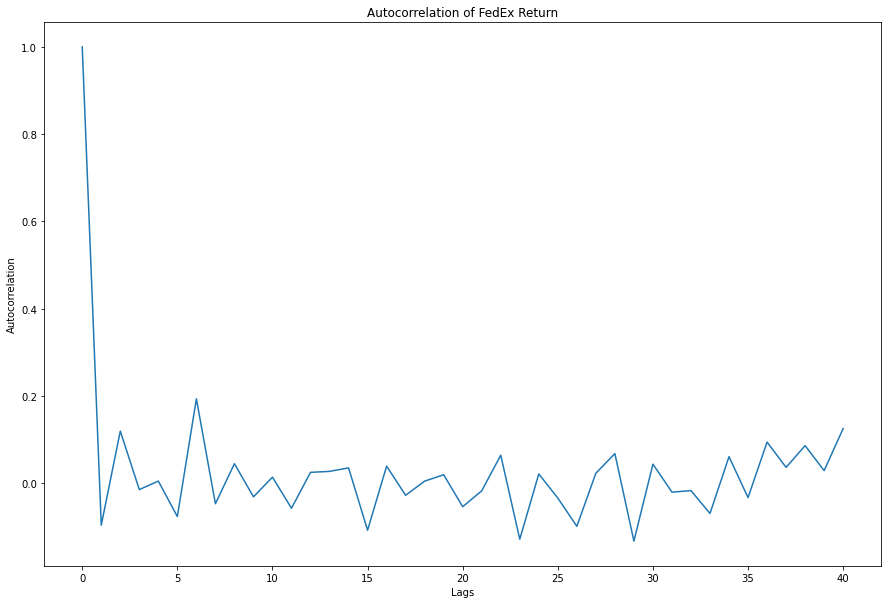

In [69]:
#Question 15: Compute the auto-correlation function (ACF) of the return time series

r_fdx = close_fdx[1:] / close_fdx[:-1].values - 1

racf_fdx = statsmodels.tsa.stattools.acf(r_fdx)

figure(figsize=(15,10))
plt.plot(racf_fdx)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of FedEx Return')
plt.show()

## ARMA models

Text(0, 0.5, 'PACF')

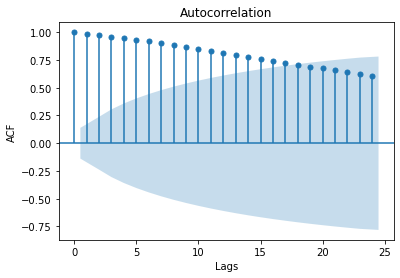

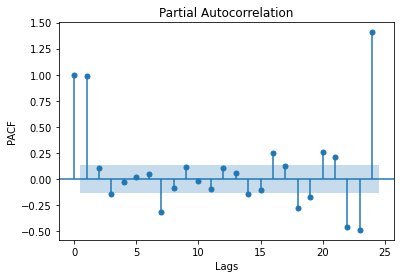

In [70]:
# Plot the ACF and PACF of the price time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig1 = plot_acf(fdx['Adj Close'].dropna())
plt.xlabel('Lags')
plt.ylabel('ACF')

fig_1 = plot_pacf(fdx['Adj Close'].dropna())
plt.xlabel('Lags')
plt.ylabel('PACF')

In [71]:
import warnings
warnings.filterwarnings('ignore')

# Model Selection for the ARMA model of FedEx price
result = sm.tsa.arma_order_select_ic(fdx['Close'], ic=['aic','bic'], trend='nc')
result.aic_min_order
result.bic_min_order
print(result)

{'aic':              0            1            2
0          NaN  2541.864867  2297.858079
1  1159.939710  1160.390473  1160.353362
2  1160.094067  1156.879122  1162.323523
3  1160.405839  1164.315840  1171.782873
4  1162.403414          NaN  1291.436778, 'bic':              0            1            2
0          NaN  2548.461502  2307.753031
1  1166.536345  1170.285425  1173.546632
2  1169.989019  1170.072392  1178.815109
3  1173.599108  1180.807426  1191.572777
4  1178.895001          NaN  1314.525000, 'aic_min_order': (2, 1), 'bic_min_order': (1, 0)}


In [72]:
# Question 18: Fit an ARMA model to the price time series

from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error

X = fdx['Close'].values
train, test = X[1:len(X)-40], X[len(X)-40:]

# Fit an ARMA model to the price
model = ARMA(train, order=(1,0))
model_fit = model.fit()

In [73]:
# Question 19 : Display the parameters of the model and its Mean Squared Error (MSE)

# ARMA Model Results
print(model_fit.summary())

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
error = mean_squared_error(test, predictions)
print('The Mean Squared Error (MSE) of the price is %s' % error)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  159
Model:                     ARMA(1, 0)   Log Likelihood                -463.670
Method:                       css-mle   S.D. of innovations              4.419
Date:                Tue, 22 Feb 2022   AIC                            933.341
Time:                        19:01:30   BIC                            942.547
Sample:                             0   HQIC                           937.079
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.2092     18.700     14.183      0.000     228.559     301.860
ar.L1.y        0.9864      0.010     96.767      0.000       0.966       1.006
                                    Roots           

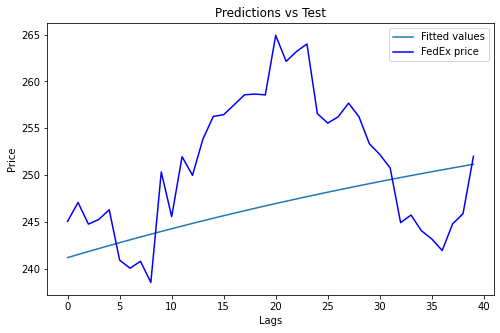

In [74]:
# Plot the ARMA model predictions of the price against the test

figure(figsize=(8,5))
plt.plot(predictions)
plt.plot(test, color='b')
plt.xlabel('Lags')
plt.ylabel('Price')
plt.legend(["Fitted values", "FedEx price"])
plt.title('Predictions vs Test')
plt.show()

Text(0, 0.5, 'PACF')

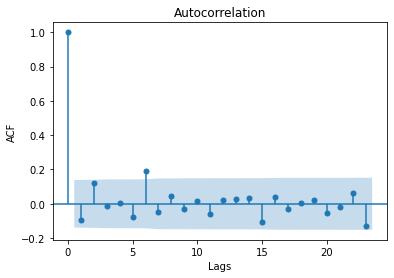

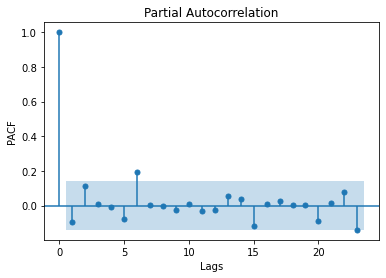

In [75]:
# Plot the ACF and PACF of the return time series

fig2 = plot_acf(fdx['return'].dropna())
plt.xlabel('Lags')
plt.ylabel('ACF')

fig_2 = plot_pacf(fdx['return'].dropna())
plt.xlabel('Lags')
plt.ylabel('PACF')

In [76]:
# Model Selection for the ARMA model of FedEx return
result1 = sm.tsa.arma_order_select_ic(fdx['return'].dropna(), ic=['aic','bic'], trend='nc')
result1.aic_min_order
result1.bic_min_order
print(result1)

{'aic':              0            1            2
0          NaN -1079.074484 -1080.128610
1 -1079.419314 -1083.770549 -1078.134488
2 -1079.937565 -1077.947260 -1081.649554
3 -1077.949255 -1075.862639 -1071.503529
4 -1075.960967 -1073.854460 -1076.482934, 'bic':              0            1            2
0          NaN -1072.487874 -1070.248695
1 -1072.832705 -1073.890634 -1064.961269
2 -1070.057651 -1064.774041 -1065.183030
3 -1064.776035 -1059.396115 -1051.743700
4 -1059.494442 -1054.094631 -1053.429800, 'aic_min_order': (1, 1), 'bic_min_order': (1, 1)}


In [77]:
# Question 20: Fit an ARMA model to the return time series

Z = fdx['return'].dropna().values
train_1, test_1 = Z[1:len(Z)-39], Z[len(Z)-39:]

# Fit an ARMA model to the price
model_1 = ARMA(train_1, order=(1,1))
model_fit_1 = model_1.fit()

In [78]:
# Question 21: Display the parameters of the model and its Mean Squared Error (MSE)

# ARMA Model Results
print(model_fit_1.summary())

# Make predictions
predictions_1 = model_fit_1.predict(start=len(train_1), end=len(train_1)+len(test_1)-1, dynamic=False)
error_1 = mean_squared_error(test_1, predictions_1)
print('The Mean Squared Error (MSE) of the price is %s' % error_1)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  159
Model:                     ARMA(1, 1)   Log Likelihood                 430.537
Method:                       css-mle   S.D. of innovations              0.016
Date:                Tue, 22 Feb 2022   AIC                           -853.074
Time:                        19:01:37   BIC                           -840.799
Sample:                             0   HQIC                          -848.089
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.511      0.610      -0.003       0.002
ar.L1.y       -0.9660      0.063    -15.329      0.000      -1.090      -0.842
ma.L1.y        0.9119      0.097      9.444      0.0

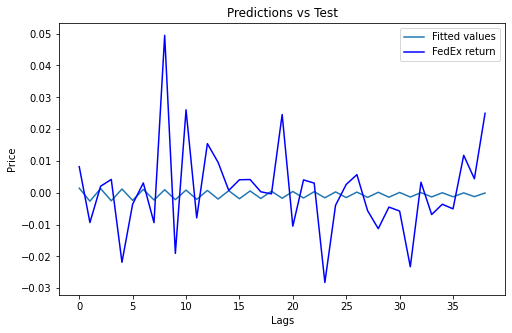

In [79]:
# Plot the ARMA model predictions of the return against the test

figure(figsize=(8,5))
plt.plot(predictions_1)
plt.plot(test_1, color='b')
plt.xlabel('Lags')
plt.ylabel('Price')
plt.legend(["Fitted values", "FedEx return"])
plt.title('Predictions vs Test')
plt.show()

## Stationarity test

In [80]:
# Question 24: Perform a stationarity test of the return time series

from statsmodels.tsa.stattools import adfuller

result = adfuller(r_fdx)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.340736
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


In [81]:
# Check the stationarity test

def adf_check(time_series):
    
    result = adfuller(r_fdx)
    print('Augmented Dickey-Fuller Test')
    labels = ['ADF Test Statistic', 'p-value', '# of lags', 'Number of observations used']
    
    for value, label in zip(result,labels):
        print(label+' : '+str(value))
        
    if result[1]<0.05:
        print('Strong evidence against null hypothesis')
        print('Reject null hypothesis')
        print('Data has no unit root and is stationary')
        
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root and is non-stationary')

In [82]:
adf_check(r_fdx)

Augmented Dickey-Fuller Test
ADF Test Statistic : -15.340736092421881
p-value : 3.834291990179076e-28
# of lags : 0
Number of observations used : 198
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary
